In [27]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/kaggle/input\playground-series-s5e7\sample_submission.csv
/kaggle/kaggle/input\playground-series-s5e7\test.csv
/kaggle/kaggle/input\playground-series-s5e7\train.csv
/kaggle/kaggle/input\playground-series-s5e8\sample_submission.csv
/kaggle/kaggle/input\playground-series-s5e8\test.csv
/kaggle/kaggle/input\playground-series-s5e8\train.csv


In [29]:
train = pd.read_csv("/kaggle/kaggle/input/playground-series-s5e8/train.csv")
test = pd.read_csv("/kaggle/kaggle/input/playground-series-s5e8/test.csv")

KeyboardInterrupt: 

In [ ]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [ ]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
test.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [ ]:
train.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
train["job"].unique()

array(['technician', 'blue-collar', 'student', 'admin.', 'management',
       'entrepreneur', 'self-employed', 'unknown', 'services', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc_job = LabelEncoder()
train["job"] = enc_job.fit_transform(train["job"])


In [ ]:
enc_marital = LabelEncoder()
train["marital"] = enc_marital.fit_transform(train["marital"])
enc_education = LabelEncoder()
train["education"] = enc_education.fit_transform(train["education"])
enc_default = LabelEncoder()
train["default"] = enc_default.fit_transform(train["default"])
enc_housing = LabelEncoder()
train["housing"] = enc_housing.fit_transform(train["housing"])
enc_loan = LabelEncoder()
train["loan"] = enc_loan.fit_transform(train["loan"])
enc_contact = LabelEncoder()
train["contact"] = enc_contact.fit_transform(train["contact"])
enc_month = LabelEncoder()
train["month"] = enc_month.fit_transform(train["month"])
enc_poutcome = LabelEncoder()
train["poutcome"] = enc_poutcome.fit_transform(train["poutcome"])

In [ ]:
test["job"] = enc_job.fit_transform(test["job"])
test["marital"] = enc_marital.fit_transform(test["marital"])
test["education"] = enc_education.fit_transform(test["education"])
test["default"] = enc_default.fit_transform(test["default"])
test["housing"] = enc_housing.fit_transform(test["housing"])
test["loan"] = enc_loan.fit_transform(test["loan"])
test["contact"] = enc_contact.fit_transform(test["contact"])
test["month"] = enc_month.fit_transform(test["month"])
test["poutcome"] = enc_poutcome.fit_transform(test["poutcome"])

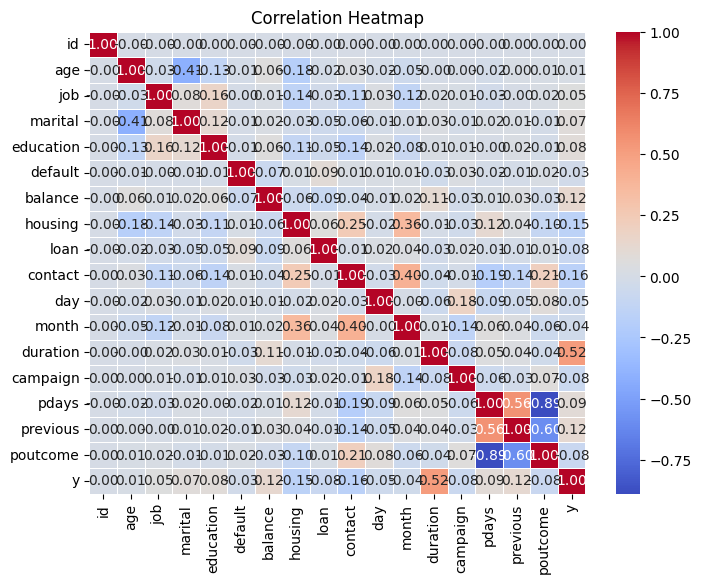

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
tain_data = train.drop(columns=["id", "y","age", "education"])
test_data = test.drop(columns=["id","age", "education"])

In [ ]:
tain_data.head()

,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,9,1,0,7,0,0,0,25,1,117,3,-1,0,3
1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3
2,1,1,0,602,1,0,2,14,8,111,2,-1,0,3
3,8,2,0,34,1,0,2,28,8,10,2,-1,0,3
4,9,1,0,889,1,0,0,3,3,902,1,-1,0,3


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(tain_data, train["y"])

KeyboardInterrupt: 

In [ ]:
sol=model.predict(test_data)

In [ ]:
submission = pd.DataFrame({
    "id": test["id"],
    "y": sol
})
submission.to_csv("submission.csv", index=False)